## Handwritten Digit Recognition

In [32]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [33]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [34]:
X_train.shape

(60000, 28, 28)

In [35]:
Y_train.shape

(60000,)

In [36]:
X_test.shape

(10000, 28, 28)

In [37]:
Y_test.shape

(10000,)

In [38]:
import matplotlib.pyplot as plt

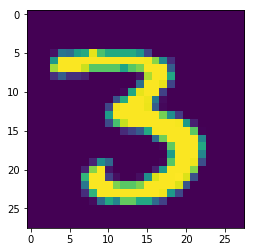

In [42]:
plt.imshow(X_train[12])

In [43]:
def preprocess_data(X,Y):
  X=X.reshape((-1,28,28,1))
  X=X/255.0
  Y=to_categorical(Y)
  return X,Y

In [44]:
X_train,Y_train=preprocess_data(X_train,Y_train)
print(X_train.shape,Y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [45]:
X_test,Y_test=preprocess_data(X_test,Y_test)
print(X_test.shape,Y_test.shape)

(10000, 28, 28, 1) (10000, 10)


In [16]:
from keras.layers import *
from keras import models


In [17]:
model=models.Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()

W0930 23:50:36.967135  3112 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0930 23:50:36.998415  3112 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0930 23:50:37.009792  3112 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0930 23:50:37.030127  3112 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [18]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
hist=model.fit(X_train,Y_train,epochs=20,validation_split=0.1,batch_size=128)

W0930 23:50:38.759217  3112 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0930 23:50:38.785008  3112 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0930 23:50:38.887184  3112 deprecation.py:323] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0930 23:50:38.957616  3112 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Pl

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 26s 489us/step - loss: 0.2702 - acc: 0.9201 - val_loss: 0.0663 - val_acc: 0.9820
Epoch 2/20
54000/54000 [==============================] - 26s 475us/step - loss: 0.0669 - acc: 0.9795 - val_loss: 0.0416 - val_acc: 0.9888
Epoch 3/20
54000/54000 [==============================] - 26s 491us/step - loss: 0.0469 - acc: 0.9850 - val_loss: 0.0422 - val_acc: 0.9878
Epoch 4/20
54000/54000 [==============================] - 27s 505us/step - loss: 0.0355 - acc: 0.9885 - val_loss: 0.0389 - val_acc: 0.9897
Epoch 5/20
54000/54000 [==============================] - 26s 484us/step - loss: 0.0296 - acc: 0.9903 - val_loss: 0.0399 - val_acc: 0.9887
Epoch 6/20
54000/54000 [==============================] - 28s 516us/step - loss: 0.0225 - acc: 0.9928 - val_loss: 0.0409 - val_acc: 0.9905
Epoch 7/20
54000/54000 [==============================] - 28s 516us/step - loss: 0.0195 - acc: 0.9937 - val_loss: 0.0

In [21]:
model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 1s 117us/step


[0.03417656211821809, 0.9931]

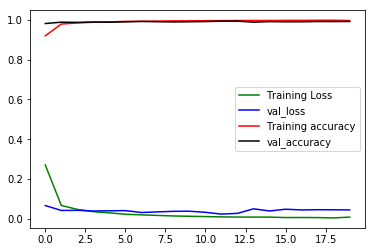

In [26]:
plt.figure(0)
plt.plot(hist.history['loss'],'g',label='Training Loss')
plt.plot(hist.history['val_loss'],'b',label="val_loss")

plt.plot(hist.history['acc'],'r',label="Training accuracy")
plt.plot(hist.history['val_acc'],'black',label="val_accuracy")
plt.legend()
plt.show()


## 99 percent accuracy